Load Image

In [17]:
import cv2
import numpy as np

unprocessed = r"C:\Users\TarFa\code\climbingBuddy\fastAPI\processing\climbing1.jpeg"

Crop Image

In [18]:
image = cv2.imread(unprocessed)
image = image[0:950, 100:800]
image = cv2.resize(image, (500,500), interpolation=cv2.INTER_LINEAR)
blurColor = cv2.blur(image, (3,3))

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (3,3))

edged = cv2.Canny(blur, 30, 200)

In [20]:
data = np.float32(blurColor).reshape((-1, 3))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0) 

ret, label, center = cv2.kmeans(data, 10, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)

result = center[label.flatten()]
result = result.reshape(blurColor.shape)




In [21]:
# ret, thresh = cv2.threshold(edged, 127, 255, 0)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# avgColor = []
# for contour in [contours[15]]:
#     mask = np.zeros(image.shape, np.uint8)
#     singleContourMask = cv2.drawContours(mask, contour, -1, (255,255,255), cv2.FILLED)
#     singleContourImage = cv2.bitwise_and(image, singleContourMask, mask=None)





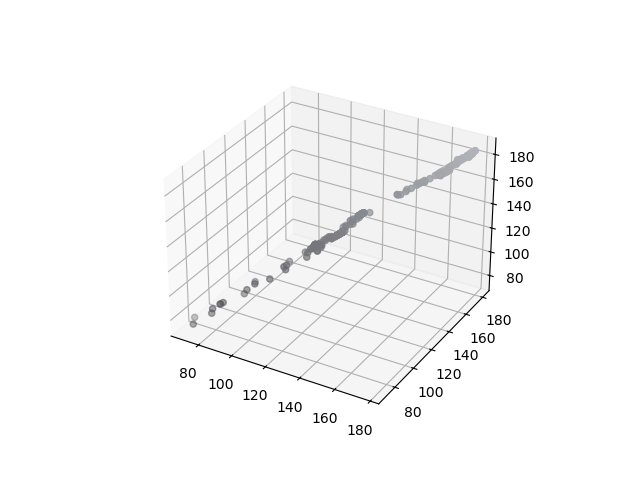

sad


In [22]:
# %matplotlib widget

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

image = cv2.resize(image, (400,400), interpolation=cv2.INTER_LINEAR)

pixels = np.array(image).reshape(-1, image.shape[-1])

colours = pixels / 255


fig = plt.figure()
ax = fig.add_subplot(projection="3d")

n = 200
pixels = pixels[:n]
blue, green, red = pixels[:, 0], pixels[:, 1], pixels[:, 2]

ax.scatter(blue, green, red, c=colours[:n], marker="o")

# plt.ion()

plt.show()

print("sad")




In [9]:
# cv2.imshow("canny edged", edged)
# cv2.imshow("blurred", blur)
cv2.imshow("blurred", result)
cv2.waitKey(0)

cv2.destroyAllWindows()